# MEEP Zdroje 

V **MEEP** môžeme zdroje elektromagnetickej energie simulovať ako bodové, lineárne (v 2D) alebo plošné (v 3D) zdroje. Z časového hľadiska môžu byť zdroje harmonické (spojité) alebo impulzné.  Pre špeciálne prípady je možné definovať aj zdroje s uživateľsky definovaným časovým priebehom. Zdroje sú aditívne, v simulačnej oblasti ich môžeme umiestniť ľubovolný počet.\\

Vlastnosti zdrojov budeme sledovať na oblasti 100x100 uzlov, inicializácia prostredia a funkcia na zobrazenie vygenerovanej elektromagnetickej vlny je v súbore */utils/mp_src_plot.py*:

    import meep as mp 
    import matplotlib.pyplot as plt
    from utils.utils import src_plot

    dx = 100
    dy = 100
    area = mp.Vector3(dx, dy, 0)
    
    def src_plot(dx, dy, data, resolution=1):
        #  plotting 2D wave from source and wave cross section at y=50
        ...

## ContinuousSource

Zdroj [*ContinuousSource*](https://meep.readthedocs.io/en/latest/Python_User_Interface/#continuoussource) reprezentuje bodový spojitý harmonický zdroj elektromagnetickej energie s konštantnou frekvenciou. V definícii zdroja sa určuje zložka elektromagnetického vlnenia, frekvencia a poloha zdroja.

<!-- MEDSKIP -->


Field time usage:
        connecting chunks: 0.0108479 s
            time stepping: 0.0593565 s
            communicating: 0.00881756 s
        outputting fields: 0.00123634 s
     Fourier transforming: 3.544e-05 s
          everything else: 0.00254638 s

-----------
Initializing structure...
Working in 2D dimensions.
Computational cell is 100 x 100 x 0 with resolution 2
time for set_epsilon = 0.0558208 s
-----------
run 0 finished at t = 100.0 (400 timesteps)


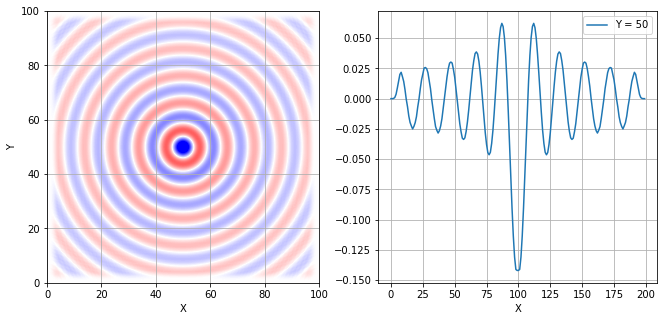

In [3]:
%matplotlib inline
from utils.mp_src_plot import *

sources = [ mp.Source( mp.ContinuousSource(frequency=0.1), 
                component=mp.Ez, 
                center=mp.Vector3(0,0,0) )]
                     
sim = mp.Simulation(cell_size=area, 
                boundary_layers=[mp.PML(5.0)],
                geometry=[], 
                sources=sources, 
                resolution=2)

sim.run(until=100)

data = sim.get_array(center=mp.Vector3(), 
                size=area, 
                component=mp.Ez)

src_plot(dx, dy, data.transpose(), 2)

<!---  REMOVE -->  
### Animácia časového vývoja

<!-- REMOVE -->
<img src="./img/img_cont_01.gif" >

<!-- REMOVE -->
<img src="./img/img_cont_02.gif" >